1. Encuentre las primeras dos iteraciones del método de Jacobi para los siguientes sistemas lineales, por medio de $x^{(0)} = 0$:

In [14]:
import numpy as np

def gauss_jacobi(A, b, x0=None, tolerance=1e-6, max_iterations=100):
    """
    Resuelve el sistema Ax = b usando el método iterativo de Jacobi.
    
    Parámetros:
        A: lista de listas o matriz (cuadrada) con los coeficientes.
        b: lista con los términos independientes.
        x0: vector solución inicial. Si es None, se usa b[i]/A[i][i] para cada i.
        tolerance: tolerancia para el criterio de convergencia.
        max_iterations: número máximo de iteraciones a realizar.
    
    Retorna:
        x: vector solución aproximado.
    """
    n = len(b)
    
    if x0 is None:
        x = [b[i] / A[i][i] for i in range(n)]
    else:
        if len(x0) != n:
            raise ValueError("El vector de aproximación inicial no tiene la dimensión adecuada.")
        x = x0.copy()  
    
    for k in range(1, max_iterations + 1):
        x_new = [0] * n
        for i in range(n):
            s = 0
            for j in range(n):
                if j != i:
                    s += A[i][j] * x[j]
            x_new[i] = (b[i] - s) / A[i][i]
        
        print(f"Iteración {k}:", x_new)
        
        diff = max(abs(x_new[i] - x[i]) for i in range(n))
        if diff < tolerance:
            print("Se alcanzó la convergencia.")
            return x_new
        
        x = x_new
    
    print("No se alcanzó la convergencia en el número máximo de iteraciones.")
    return x

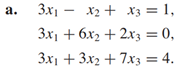

In [12]:
A = [
    [10.0, -1, 0],
    [-1, 10, -2],
    [0, -2, 10]
]
b = [9, 7, 6]

x0 = [0, 0, 0]
solucion = gauss_jacobi(A, b, x0=x0, max_iterations=2)

Iteración 1: [0.9, 0.7, 0.6]
Iteración 2: [0.97, 0.9099999999999999, 0.74]
No se alcanzó la convergencia en el número máximo de iteraciones.


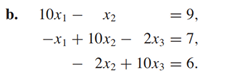

In [14]:
A = [
    [10.0, -1, 0],
    [-1, 10, -2],
    [0, -2, 10]
]
b = [9, 7, 6]

x0 = [0, 0, 0]
solucion = gauss_jacobi(A, b, x0=x0, max_iterations=2)

Iteración 1: [0.6, 2.5, -1.375, -2.2]
Iteración 2: [-0.65, 1.65, -0.4, -2.475]
No se alcanzó la convergencia en el número máximo de iteraciones.


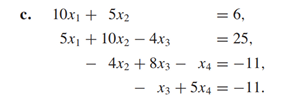

In [ ]:
A = [
    [10, 5, 0, 0],
    [5, 10, -4, 0],
    [0, -4, 8, -1],
    [0, 0, -1, 5]
]
b = [6, 25, -11, -11]

x0 = [0, 0, 0, 0]
solucion = gauss_jacobi(A, b, x0=x0, max_iterations=2)

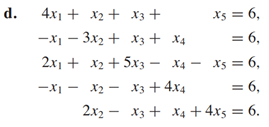

In [16]:
A = [
    [4, 1, 1, 1, 1],
    [-1, -3, 1, 1, 0],
    [2, 1, 5, -1, -1],
    [-1, -1, 3, 4, 0],
    [2, 2, 1, 0, 4]
]
b = [6, 6, 6, 6, 6]

x0 = [0, 0, 0, 0, 0]
solucion = gauss_jacobi(A, b, x0=x0, max_iterations=2)

Iteración 1: [1.5, -2.0, 1.2, 1.5, 1.5]
Iteración 2: [0.95, -1.5999999999999999, 1.6, 0.4750000000000001, 1.45]
No se alcanzó la convergencia en el número máximo de iteraciones.


2. Repita el ejercicio 1 usando el método de Gauss-Siedel.

In [4]:
def gauss_seidel(A, b, x0=None, tolerance=1e-6, max_iterations=100):
    """
    Resuelve el sistema Ax = b usando el método iterativo de Gauss-Seidel.

    Parámetros:
        A: lista de listas (matriz cuadrada) de coeficientes.
        b: lista de términos independientes.
        x0: vector solución inicial. Si es None, se usa b[i] / A[i][i] para cada i.
        tolerance: tolerancia para el criterio de convergencia.
        max_iterations: número máximo de iteraciones a realizar.

    Retorna:
        x: vector solución aproximado.
    """
    n = len(b)
    
    if x0 is None:
        x = [b[i] / A[i][i] for i in range(n)]
    else:
        if len(x0) != n:
            raise ValueError("El vector de aproximación inicial no tiene la dimensión adecuada.")
        x = x0.copy()
        
    for k in range(1, max_iterations + 1):
        x_new = x.copy()
        for i in range(n):
            sum_before = sum(A[i][j] * x_new[j] for j in range(i))
            sum_after  = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - sum_before - sum_after) / A[i][i]
        
        print(f"Iteración {k}:", x_new)
        
        diff = max(abs(x_new[i] - x[i]) for i in range(n))
        if diff < tolerance:
            print("Se alcanzó la convergencia.")
            return x_new
        
        x = x_new.copy()
    
    print("No se alcanzó la convergencia en el número máximo de iteraciones.")
    return x

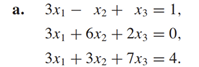

In [23]:
A = [
    [10.0, -1, 0],
    [-1, 10, -2],
    [0, -2, 10]
]
b = [9, 7, 6]

x0 = [0, 0, 0]
solucion = gauss_seidel(A, b, x0=x0, max_iterations=2)

Iteración 1: [0.9, 0.79, 0.758]
Iteración 2: [0.9789999999999999, 0.9495000000000001, 0.7899]
No se alcanzó la convergencia en el número máximo de iteraciones.


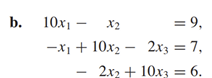

In [24]:
A = [
    [10.0, -1, 0],
    [-1, 10, -2],
    [0, -2, 10]
]
b = [9, 7, 6]

x0 = [0, 0, 0]
solucion = gauss_seidel(A, b, x0=x0, max_iterations=2)

Iteración 1: [0.9, 0.79, 0.758]
Iteración 2: [0.9789999999999999, 0.9495000000000001, 0.7899]
No se alcanzó la convergencia en el número máximo de iteraciones.


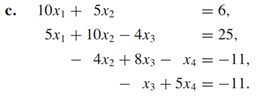

In [26]:
A = [
    [10, 5, 0, 0],
    [5, 10, -4, 0],
    [0, -4, 8, -1],
    [0, 0, -1, 5]
]
b = [6, 25, -11, -11]

x0 = [0, 0, 0, 0]
solucion = gauss_seidel(A, b, x0=x0, max_iterations=2)

Iteración 1: [0.6, 2.2, -0.2749999999999999, -2.255]
Iteración 2: [-0.5, 2.6399999999999997, -0.33687500000000015, -2.2673750000000004]
No se alcanzó la convergencia en el número máximo de iteraciones.


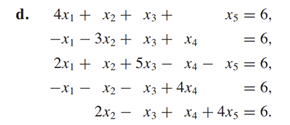

In [27]:
A = [
    [4, 1, 1, 1, 1],
    [-1, -3, 1, 1, 0],
    [2, 1, 5, -1, -1],
    [-1, -1, 3, 4, 0],
    [2, 2, 1, 0, 4]
]
b = [6, 6, 6, 6, 6]

x0 = [0, 0, 0, 0, 0]
solucion = gauss_seidel(A, b, x0=x0, max_iterations=2)

Iteración 1: [1.5, -2.5, 1.1, 0.4249999999999998, 1.725]
Iteración 2: [1.3125, -1.9291666666666665, 1.4908333333333332, 0.2277083333333334, 1.435625]
No se alcanzó la convergencia en el número máximo de iteraciones.


3. Utilice el método de Jacobi para resolver los sistemas lineales en el ejercicio 1, con TOL = 10-3.

**a.**

In [30]:
A = [
    [3, -1, 1],
    [3, 6, 2],
    [3, 3, 7]
]
b = [1, 0, 4]

x0 = [0, 0, 0]
solucion = gauss_jacobi(A, b, x0=x0, tolerance=1e-3)

Iteración 1: [0.3333333333333333, 0.0, 0.5714285714285714]
Iteración 2: [0.14285714285714288, -0.35714285714285715, 0.42857142857142855]
Iteración 3: [0.07142857142857144, -0.21428571428571427, 0.6632653061224489]
Iteración 4: [0.040816326530612256, -0.2568027210884354, 0.6326530612244898]
Iteración 5: [0.03684807256235826, -0.23129251700680276, 0.6639941690962099]
Iteración 6: [0.03490443796566245, -0.23975542597991575, 0.6547619047619049]
Iteración 7: [0.035160889752726465, -0.2357061872367995, 0.6592218520061086]
Iteración 8: [0.035023986919030636, -0.23732106221173277, 0.6573765560646027]
Iteración 9: [0.03510079390788819, -0.23663751214771622, 0.6581273179825866]
Se alcanzó la convergencia.


**b.**

In [31]:
A = [
    [10.0, -1, 0],
    [-1, 10, -2],
    [0, -2, 10]
]
b = [9, 7, 6]

x0 = [0, 0, 0]
solucion = gauss_jacobi(A, b, x0=x0, tolerance=1e-3)

Iteración 1: [0.9, 0.7, 0.6]
Iteración 2: [0.97, 0.9099999999999999, 0.74]
Iteración 3: [0.991, 0.945, 0.782]
Iteración 4: [0.9945, 0.9555, 0.7889999999999999]
Iteración 5: [0.99555, 0.9572499999999999, 0.7910999999999999]
Iteración 6: [0.995725, 0.957775, 0.79145]
Se alcanzó la convergencia.


**c.**

In [32]:
A = [
    [10, 5, 0, 0],
    [5, 10, -4, 0],
    [0, -4, 8, -1],
    [0, 0, -1, 5]
]
b = [6, 25, -11, -11]

x0 = [0, 0, 0, 0]
solucion = gauss_jacobi(A, b, x0=x0, tolerance=1e-3)

Iteración 1: [0.6, 2.5, -1.375, -2.2]
Iteración 2: [-0.65, 1.65, -0.4, -2.475]
Iteración 3: [-0.225, 2.665, -0.859375, -2.2800000000000002]
Iteración 4: [-0.7324999999999999, 2.26875, -0.3275000000000001, -2.371875]
Iteración 5: [-0.534375, 2.7352499999999997, -0.5371093750000001, -2.2655000000000003]
Iteración 6: [-0.767625, 2.55234375, -0.29056250000000006, -2.307421875]
Iteración 7: [-0.676171875, 2.7675875, -0.38725585937500007, -2.2581125]
Iteración 8: [-0.7837937499999998, 2.68318359375, -0.2734703125000002, -2.2774511718749997]
Iteración 9: [-0.741591796875, 2.78250875, -0.3180895996093751, -2.2546940625]
Iteración 10: [-0.791254375, 2.74356005859375, -0.26558238281250013, -2.263617919921875]
Iteración 11: [-0.7717800292968751, 2.789394234375, -0.2861722106933595, -2.2531164765625]
Iteración 12: [-0.7946971171874999, 2.7714211303710936, -0.2619424423828125, -2.257234442138672]
Iteración 13: [-0.7857105651855468, 2.792571581640625, -0.27144374008178707, -2.2523884884765626]
Itera

**d.**

In [33]:
A = [
    [4, 1, 1, 1, 1],
    [-1, -3, 1, 1, 0],
    [2, 1, 5, -1, -1],
    [-1, -1, 3, 4, 0],
    [2, 2, 1, 0, 4]
]
b = [6, 6, 6, 6, 6]

x0 = [0, 0, 0, 0, 0]
solucion = gauss_jacobi(A, b, x0=x0, tolerance=1e-3)

Iteración 1: [1.5, -2.0, 1.2, 1.5, 1.5]
Iteración 2: [0.95, -1.5999999999999999, 1.6, 0.4750000000000001, 1.45]
Iteración 3: [1.0187499999999998, -1.625, 1.525, 0.13749999999999973, 1.4249999999999998]
Iteración 4: [1.1343750000000001, -1.7854166666666667, 1.4300000000000002, 0.20468750000000013, 1.421875]
Iteración 5: [1.1822135416666666, -1.8332291666666667, 1.4286458333333332, 0.26473958333333325, 1.468020833333333]
Iteración 6: [1.1679557291666667, -1.8296093750000002, 1.4403124999999999, 0.2657617187500001, 1.4683463541666668]
Iteración 7: [1.1637972005208335, -1.820627170138889, 1.4455611979166667, 0.2543522135416667, 1.4707486979166668]
Iteración 8: [1.1624912651909722, -1.8212945963541667, 1.4436267361111113, 0.25162160915798615, 1.4670246853298612]
Iteración 9: [1.164755391438802, -1.8224143066406249, 1.442991672092014, 0.25257911512586806, 1.4684949815538193]
Iteración 10: [1.164587134467231, -1.8230615347403065, 1.4427955240885417, 0.25334151713053377, 1.4680815395779079]
Se

4. Utilice el método de Gauss-Siedel para resolver los sistemas lineales en el ejercicio 1, con TOL = 10-3.

**a.**

In [35]:
A = [
    [3, -1, 1],
    [3, 6, 2],
    [3, 3, 7]
]
b = [1, 0, 4]

x0 = [0, 0, 0]
solucion = gauss_seidel(A, b, x0=x0, tolerance=1e-3)

Iteración 1: [0.3333333333333333, -0.16666666666666666, 0.5]
Iteración 2: [0.11111111111111112, -0.22222222222222224, 0.619047619047619]
Iteración 3: [0.05291005291005294, -0.2328042328042328, 0.6485260770975056]
Iteración 4: [0.039556563366087184, -0.23595364071554548, 0.6555987474354821]
Iteración 5: [0.03614920394965748, -0.2366075177866561, 0.6573392773587138]
Iteración 6: [0.0353510682848767, -0.23678862659534294, 0.6577589535616284]
Se alcanzó la convergencia.


**b.**

In [34]:
A = [
    [10.0, -1, 0],
    [-1, 10, -2],
    [0, -2, 10]
]
b = [9, 7, 6]

x0 = [0, 0, 0]
solucion = gauss_seidel(A, b, x0=x0, tolerance=1e-3)


Iteración 1: [0.9, 0.79, 0.758]
Iteración 2: [0.9789999999999999, 0.9495000000000001, 0.7899]
Iteración 3: [0.99495, 0.957475, 0.7914950000000001]
Iteración 4: [0.9957475, 0.9578737500000001, 0.79157475]
Se alcanzó la convergencia.


**c.**

In [36]:
A = [
    [10, 5, 0, 0],
    [5, 10, -4, 0],
    [0, -4, 8, -1],
    [0, 0, -1, 5]
]
b = [6, 25, -11, -11]

x0 = [0, 0, 0, 0]
solucion = gauss_seidel(A, b, x0=x0, tolerance=1e-3)

Iteración 1: [0.6, 2.2, -0.2749999999999999, -2.255]
Iteración 2: [-0.5, 2.6399999999999997, -0.33687500000000015, -2.2673750000000004]
Iteración 3: [-0.72, 2.72525, -0.29579687500000007, -2.2591593750000003]
Iteración 4: [-0.7626249999999999, 2.76299375, -0.27589804687499997, -2.255179609375]
Iteración 5: [-0.781496875, 2.78038921875, -0.26670284179687503, -2.253340568359375]
Iteración 6: [-0.7901946093749999, 2.78841616796875, -0.26245948706054695, -2.252491897412109]
Iteración 7: [-0.7942080839843749, 2.7921202471679685, -0.2605013635925294, -2.252100272718506]
Iteración 8: [-0.7960601235839843, 2.7938295163549807, -0.2595977759123229, -2.2519195551824644]
Iteración 9: [-0.7969147581774904, 2.794618268723816, -0.2591808100359001, -2.25183616200718]
Se alcanzó la convergencia.


**d.**

In [37]:
A = [
    [4, 1, 1, 1, 1],
    [-1, -3, 1, 1, 0],
    [2, 1, 5, -1, -1],
    [-1, -1, 3, 4, 0],
    [2, 2, 1, 0, 4]
]
b = [6, 6, 6, 6, 6]

x0 = [0, 0, 0, 0, 0]
solucion = gauss_seidel(A, b, x0=x0, tolerance=1e-3)

Iteración 1: [1.5, -2.5, 1.1, 0.4249999999999998, 1.725]
Iteración 2: [1.3125, -1.9291666666666665, 1.4908333333333332, 0.2277083333333334, 1.435625]
Iteración 3: [1.19375, -1.8250694444444442, 1.4201805555555553, 0.2770347222222225, 1.4606145833333333]
Iteración 4: [1.1668098958333333, -1.8231982060185186, 1.4454455439814815, 0.25181876446759244, 1.4668327690972223]
Iteración 5: [1.1647752821180557, -1.8225036578896605, 1.4423209254436729, 0.2538272119743441, 1.4682839565248842]
Iteración 6: [1.1645178909866898, -1.8227899178562244, 1.4431730608764144, 0.25305219762530573, 1.4683427482156637]
Se alcanzó la convergencia.


5. El sistema lineal

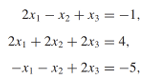

tiene solución (1, 2, -1).
    
- Muestre que el método de Jacobi con x(0) = 0 falla al proporcionar una buena aproximación 
después de 25 iteraciones. 

In [2]:
A = [
    [2, -1, 1],
    [2, 2, 2],
    [-1, -1, 2]
]
b = [-1, 4, -5]

x0 = [0, 0, 0]
solucion = gauss_jacobi(A, b, x0=x0, max_iterations=25)

Iteración 1: [-0.5, 2.0, -2.5]
Iteración 2: [1.75, 5.0, -1.75]
Iteración 3: [2.875, 2.0, 0.875]
Iteración 4: [0.0625, -1.75, -0.0625]
Iteración 5: [-1.34375, 2.0, -3.34375]
Iteración 6: [2.171875, 6.6875, -2.171875]
Iteración 7: [3.9296875, 2.0, 1.9296875]
Iteración 8: [-0.46484375, -3.859375, 0.46484375]
Iteración 9: [-2.662109375, 2.0, -4.662109375]
Iteración 10: [2.8310546875, 9.32421875, -2.8310546875]
Iteración 11: [5.57763671875, 2.0, 3.57763671875]
Iteración 12: [-1.288818359375, -7.1552734375, 1.288818359375]
Iteración 13: [-4.7220458984375, 2.0, -6.7220458984375]
Iteración 14: [3.86102294921875, 13.444091796875, -3.86102294921875]
Iteración 15: [8.152557373046875, 2.0, 6.152557373046875]
Iteración 16: [-2.5762786865234375, -12.30511474609375, 2.5762786865234375]
Iteración 17: [-7.940696716308594, 2.0, -9.940696716308594]
Iteración 18: [5.470348358154297, 19.881393432617188, -5.470348358154297]
Iteración 19: [12.175870895385742, 2.0, 10.175870895385742]
Iteración 20: [-4.587935

- Utilice el método de Gauss-Siedel con x(0) = 0:para aproximar la solución para el sistema lineal 
dentro de 10−5.

In [5]:
solucion = gauss_seidel(A, b, x0=x0, tolerance=1e-5)


Iteración 1: [-0.5, 2.5, -1.5]
Iteración 2: [1.5, 2.0, -0.75]
Iteración 3: [0.875, 1.875, -1.125]
Iteración 4: [1.0, 2.125, -0.9375]
Iteración 5: [1.03125, 1.90625, -1.03125]
Iteración 6: [0.96875, 2.0625, -0.984375]
Iteración 7: [1.0234375, 1.9609375, -1.0078125]
Iteración 8: [0.984375, 2.0234375, -0.99609375]
Iteración 9: [1.009765625, 1.986328125, -1.001953125]
Iteración 10: [0.994140625, 2.0078125, -0.9990234375]
Iteración 11: [1.00341796875, 1.99560546875, -1.00048828125]
Iteración 12: [0.998046875, 2.00244140625, -0.999755859375]
Iteración 13: [1.0010986328125, 1.9986572265625, -1.0001220703125]
Iteración 14: [0.9993896484375, 2.000732421875, -0.99993896484375]
Iteración 15: [1.000335693359375, 1.999603271484375, -1.000030517578125]
Iteración 16: [0.99981689453125, 2.000213623046875, -0.9999847412109375]
Iteración 17: [1.0000991821289062, 1.9998855590820312, -1.0000076293945312]
Iteración 18: [0.9999465942382812, 2.00006103515625, -0.9999961853027344]
Iteración 19: [1.00002861022

6. El sistema lineal

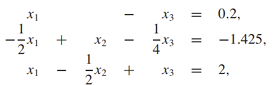

tiene solución (0.9, -0.8, 0.7)

**a.** ¿La matriz de coeficientes 

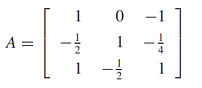

tiene diagonal estrictamente dominante?

- **Para $i = 1$**
    - $|a_{11}| > |a_{12}| + |a_{13}|$ 
    - Reemplazando: 
        - $|1| > |0| + |-1|$ 
        - $1 > 1$ 

Por lo que la matriz no es diagonal estrictamente dominante.

**b.** Utilice el método iterativo de Gauss-Siedel para aproximar la solución para el sistema lineal con 
una tolerancia de 1022 y un máximo de 300 iteraciones. 

In [10]:
A = [
    [1, 0, -1],
    [-1/2, 1, -1/4],
    [1, -1/2, 1]
]
b = [0.2, -1.425, 2]

x0 = [0, 0, 0]
solucion = gauss_seidel(A, b, x0=x0, max_iterations=300, tolerance=1e-22)

Iteración 1: [0.2, -1.325, 1.1375]
Iteración 2: [1.3375, -0.4718750000000001, 0.42656249999999996]
Iteración 3: [0.6265624999999999, -1.005078125, 0.8708984375000002]
Iteración 4: [1.0708984375000001, -0.6718261718749999, 0.5931884765625]
Iteración 5: [0.7931884765624999, -0.880108642578125, 0.7667572021484377]
Iteración 6: [0.9667572021484376, -0.7499320983886718, 0.6582767486572265]
Iteración 7: [0.8582767486572265, -0.8312924385070801, 0.7260770320892336]
Iteración 8: [0.9260770320892335, -0.7804422259330749, 0.6837018549442291]
Iteración 9: [0.883701854944229, -0.8122236087918282, 0.710186340659857]
Iteración 10: [0.9101863406598569, -0.7923602445051073, 0.6936335370875895]
Iteración 11: [0.8936335370875894, -0.8047748471843079, 0.7039790393202567]
Iteración 12: [0.9039790393202567, -0.7970157205098075, 0.6975131004248396]
Iteración 13: [0.8975131004248396, -0.8018651746813703, 0.7015543122344754]
Iteración 14: [0.9015543122344754, -0.7988342658241435, 0.6990285548534529]
Iteración

**c.** ¿Qué pasa en la parte b. cuando el sistema cambia por el siguiente?

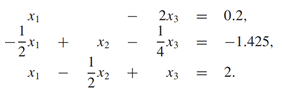

In [11]:
A = [
    [1, 0, -2],
    [-1/2, 1, -1/4],
    [1, -1/2, 1]
]
b = [0.2, -1.425, 2]

x0 = [0, 0, 0]
solucion = gauss_seidel(A, b, x0=x0, max_iterations=300, tolerance=1e-22)

Iteración 1: [0.2, -1.325, 1.1375]
Iteración 2: [2.475, 0.09687499999999999, -0.4265625000000002]
Iteración 3: [-0.6531250000000004, -1.8582031250000004, 1.7240234375]
Iteración 4: [3.6480468750000004, 0.8300292968750002, -1.2330322265625004]
Iteración 5: [-2.2660644531250007, -2.866290283203125, 2.832919311523438]
Iteración 6: [5.865838623046876, 2.2161491394042976, -2.7577640533447276]
Iteración 7: [-5.315528106689455, -4.772205066680909, 4.9294255733490004]
Iteración 8: [10.058851146698, 4.83678196668625, -5.640460163354875]
Iteración 9: [-11.080920326709752, -8.375575204193595, 8.893132724612954]
Iteración 10: [17.986265449225908, 9.791415905766193, -11.09055749634281]
Iteración 11: [-21.981114992685622, -15.188196870428515, 16.387016557471366]
Iteración 12: [32.974033114942735, 19.15877069683921, -21.39464776652313]
Iteración 13: [-42.589295533046254, -28.06830970815391, 30.5551406789693]
Iteración 14: [61.3102813579386, 36.868925848711626, -40.875818433582786]
Iteración 15: [-81.

7. Repita el ejercicio 11 usando el método de Jacobi.

**b.**

In [12]:
A = [
    [1, 0, -1],
    [-1/2, 1, -1/4],
    [1, -1/2, 1]
]
b = [0.2, -1.425, 2]

x0 = [0, 0, 0]
solucion = gauss_jacobi(A, b, x0=x0, max_iterations=300, tolerance=1e-22)

Iteración 1: [0.2, -1.425, 2.0]
Iteración 2: [2.2, -0.8250000000000001, 1.0875]
Iteración 3: [1.2874999999999999, -0.05312499999999987, -0.6125000000000003]
Iteración 4: [-0.41250000000000026, -0.9343750000000002, 0.6859375000000001]
Iteración 5: [0.8859375, -1.4597656250000002, 1.9453125000000002]
Iteración 6: [2.1453125, -0.4957031249999999, 0.38417968749999987]
Iteración 7: [0.5841796874999998, -0.25629882812500004, -0.39316406250000036]
Iteración 8: [-0.19316406250000034, -1.2312011718750002, 1.2876708984375003]
Iteración 9: [1.4876708984375002, -1.1996643066406252, 1.5775634765625002]
Iteración 10: [1.7775634765625001, -0.2867736816406248, -0.08750305175781303]
Iteración 11: [0.11249694824218698, -0.5580940246582032, 0.07904968261718759]
Iteración 12: [0.2790496826171876, -1.3489891052246097, 1.6084560394287113]
Iteración 13: [1.8084560394287112, -0.8833611488342284, 1.0464557647705075]
Iteración 14: [1.2464557647705075, -0.2591580390930175, -0.25013661384582564]
Iteración 15: [-0

**c.**

In [13]:
A = [
    [1, 0, -2],
    [-1/2, 1, -1/4],
    [1, -1/2, 1]
]
b = [0.2, -1.425, 2]

x0 = [0, 0, 0]
solucion = gauss_jacobi(A, b, x0=x0, max_iterations=300, tolerance=1e-22)

Iteración 1: [0.2, -1.425, 2.0]
Iteración 2: [4.2, -0.8250000000000001, 1.0875]
Iteración 3: [2.375, 0.9468750000000001, -2.6125]
Iteración 4: [-5.0249999999999995, -0.890625, 0.09843750000000018]
Iteración 5: [0.39687500000000037, -3.9128906249999993, 6.5796874999999995]
Iteración 6: [13.359374999999998, 0.4183593750000001, -0.3533203125000002]
Iteración 7: [-0.5066406250000004, 5.1663574218749995, -11.150195312499998]
Iteración 8: [-22.100390624999996, -4.465869140624999, 5.0898193359375]
Iteración 9: [10.379638671875, -11.202740478515624, 21.867456054687494]
Iteración 10: [43.93491210937499, 9.231683349609373, -13.981008911132811]
Iteración 11: [-27.762017822265623, 17.04720382690429, -37.31907043457031]
Iteración 12: [-74.43814086914061, -24.635776519775387, 38.285619735717766]
Iteración 13: [76.77123947143554, -29.072665500640863, 64.12025260925292]
Iteración 14: [128.44050521850582, 52.990682888031, -89.30757222175596]
Iteración 15: [-178.41514444351193, 40.468359553813926, -99.9

8. Un cable coaxial está formado por un conductor interno de 0.1 pulgadas cuadradas y un conductor externo 
de 0.5 pulgadas cuadradas. El potencial en un punto en la sección transversal del cable se describe 
mediante la ecuación de Laplace. 

Suponga que el conductor interno se mantiene en 0 volts y el conductor externo se mantiene en 110 volts. Aproximar 
el potencial entre los dos conductores requiere resolver el siguiente sistema lineal.

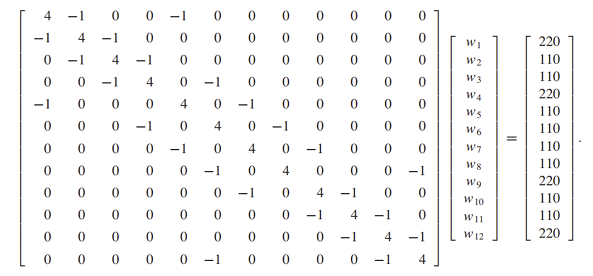

**a.** ¿La matriz es estrictamente diagonalmente dominante?

In [16]:
def es_diagonal_estrictamente_dominante(matriz):
    """
    Verifica si una matriz es diagonal estrictamente dominante.
    
    Parámetros:
        matriz (numpy.ndarray): La matriz cuadrada a verificar.
    
    Retorna:
        bool: True si la matriz es diagonal estrictamente dominante, False en caso contrario.
    """
    n = matriz.shape[0]
    for i in range(n):
        suma_fila = sum(abs(matriz[i, j]) for j in range(n) if j != i)
        diagonal = abs(matriz[i, i])
        if diagonal <= suma_fila:
            return False
    return True

In [24]:
A = np.array([
    [4, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0],
    [-1, 4, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, -1, 4, -1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, -1, 4, 0, -1, 0, 0, 0, 0, 0, 0],
    [-1, 0, 0, 0, 4, -1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, -1, -1, 4, -1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, -1, 4, -1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, -1, 4, 0, -1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 4, -1, 0, -1],
    [0, 0, 0, 0, 0, 0, 0, -1, -1, 4, -1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 4, -1],
    [0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 4]
])
resultado = es_diagonal_estrictamente_dominante(A)
print("¿La matriz es diagonal estrictamente dominante?", resultado)

¿La matriz es diagonal estrictamente dominante? True


**b.** Resuelva el sistema lineal usando el método de Jacobi con x(0) = 0 y TOL = 10-2. 

In [25]:
A = [
    [4, -1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0],
    [-1, 4, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, -1, 4, -1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, -1, 4, 0, -1, 0, 0, 0, 0, 0, 0],
    [-1, 0, 0, 0, 4, -1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, -1, -1, 4, -1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, -1, 4, -1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, -1, 4, 0, -1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 4, -1, 0, -1],
    [0, 0, 0, 0, 0, 0, 0, -1, -1, 4, -1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 4, -1],
    [0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 4]
]

b = [220, 110, 110, 220, 110, 110, 110, 110, 220, 110, 110, 220]

x0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
solucion = gauss_jacobi(A, b, x0=x0, max_iterations=300, tolerance=1e-2)

Iteración 1: [55.0, 27.5, 27.5, 55.0, 27.5, 27.5, 27.5, 27.5, 55.0, 27.5, 27.5, 55.0]
Iteración 2: [68.75, 48.125, 48.125, 68.75, 48.125, 55.0, 41.25, 41.25, 75.625, 55.0, 48.125, 75.625]
Iteración 3: [79.0625, 56.71875, 56.71875, 80.78125, 58.4375, 67.03125, 51.5625, 51.5625, 87.65625, 68.75, 60.15625, 85.9375]
Iteración 4: [83.7890625, 61.4453125, 61.875, 85.9375, 64.0234375, 75.1953125, 57.1484375, 57.578125, 93.671875, 77.34375, 66.171875, 91.953125]
Iteración 5: [86.3671875, 63.916015625, 64.345703125, 89.267578125, 67.24609375, 79.27734375, 60.693359375, 61.123046875, 97.32421875, 81.85546875, 69.82421875, 94.9609375]
Iteración 6: [87.79052734375, 65.17822265625, 65.7958984375, 90.90576171875, 68.9111328125, 81.8017578125, 62.60009765625, 63.13720703125, 99.2041015625, 84.56787109375, 71.7041015625, 96.787109375]
Iteración 7: [88.5223388671875, 65.8966064453125, 66.52099609375, 91.8994140625, 69.8980712890625, 83.104248046875, 63.7347412109375, 64.2919921875, 100.3387451171875, 8

**c.** Repita la parte b. mediante el método de Gauss-Siedel.

In [26]:
solucion = gauss_seidel(A, b, x0=x0, max_iterations=300, tolerance=1e-2)

Iteración 1: [55.0, 41.25, 37.8125, 64.453125, 41.25, 53.92578125, 40.9814453125, 37.745361328125, 55.0, 50.68634033203125, 40.17158508300781, 78.79289627075195]
Iteración 2: [75.625, 55.859375, 57.578125, 82.8759765625, 59.8876953125, 73.436279296875, 55.29541015625, 53.99543762207031, 87.3698091506958, 72.88420796394348, 65.41927605867386, 93.19727130234241]
Iteración 3: [83.936767578125, 62.87872314453125, 63.93867492675781, 89.3437385559082, 66.84326171875, 80.37060260772705, 61.09151005744934, 60.993929505348206, 96.52036981657147, 83.23339384514838, 71.6076662868727, 97.03200902586104]
Iteración 4: [87.43049621582031, 65.34229278564453, 66.17150783538818, 91.63552761077881, 69.45027470588684, 83.04432809352875, 63.50956439971924, 64.1857395612169, 100.06635071775236, 86.46493914146049, 73.37423704183038, 98.36014693989569]
Iteración 5: [88.69814187288284, 66.21741242706776, 66.96323500946164, 92.5018907757476, 70.4356174916029, 84.11176816676743, 64.57437693199608, 65.25982901836